In [3]:
import pandas as pd

data_df = pd.read_csv("c3_marketing-campaign.csv")
data_df.head()

,tv,web,radio,sales
0,0.916,1.689,0.208,1.204
1,9.359,1.706,1.071,4.800
2,5.261,2.538,2.438,3.970
3,8.682,2.092,1.283,5.212
4,11.736,1.660,1.800,5.993


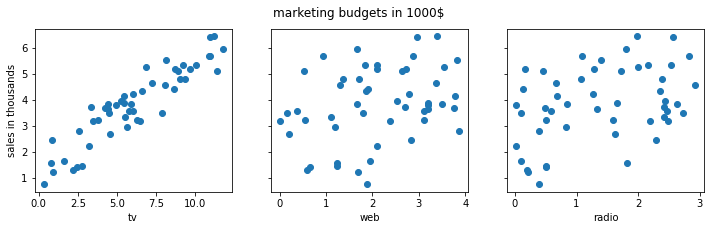

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# create figure 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3), sharey=True)
fig.suptitle("marketing budgets in 1000$")

ax1.scatter(data_df.tv, data_df.sales)
ax1.set_xlabel("tv")
ax1.set_ylabel("sales in thousands")

ax2.scatter(data_df.web, data_df.sales)
ax2.set_xlabel("web")

ax3.scatter(data_df.radio, data_df.sales)
ax3.set_xlabel("radio")

plt.show()

In [6]:
print("Shape of data_df:", data_df.shape)

Shape of data_df: (50, 4)


Number of features is called dimensionality and number of rows is cardinality

Feature Matrix & Target Vector

In [9]:
# feature matrix ie drop target & # output vector ie the target

X = data_df.drop("sales", axis=1).values
y = data_df.sales.values

In [8]:
print("Shape of X: {} dtype: {}".format(X.shape, X.dtype))

Shape of X: (50, 3) dtype: float64


In [10]:
print("Shape of y: {} dtype: {}".format(y.shape, y.dtype))

Shape of y: (50,) dtype: float64


In [11]:
# unable to use loc and iloc so have to slice data

X[:5, :]

array([[ 0.916,  1.689,  0.208],
       [ 9.359,  1.706,  1.071],
       [ 5.261,  2.538,  2.438],
       [ 8.682,  2.092,  1.283],
       [11.736,  1.66 ,  1.8  ]])

In [13]:
y[:5]

array([1.204, 4.8  , 3.97 , 5.212, 5.993])

In [14]:
# plot tv budget vs sales

x = data_df.tv.values
y = data_df.sales.values

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (50,)
y shape: (50,)


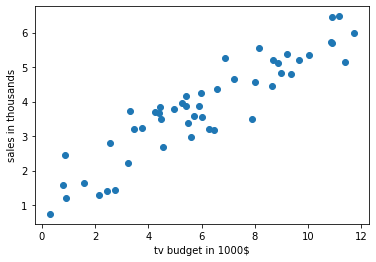

In [15]:
plt.scatter(x, y)
plt.xlabel("tv budget in 1000$")
plt.ylabel("sales in thousands")
plt.show()

In [16]:
import numpy as np

# fit linear regression model

coefs = np.polyfit(x, y, deg=1)
print("Coefficients:", coefs)

Coefficients: [0.42063597 1.27867727]


In [17]:
# generate 100 datapoints
x_values = np.linspace(x.min(), x.max(), num=100)

# compute predictions
y_values = np.polyval(coefs, x_values)

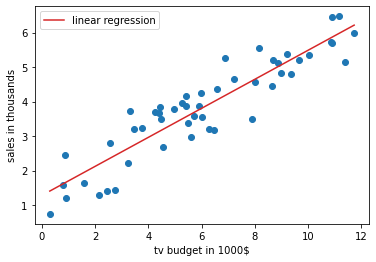

In [18]:
plt.scatter(x, y)
plt.plot(x_values, y_values, c="C3", label="linear regression")
plt.xlabel("tv budget in 1000$")
plt.ylabel("sales in thousands")
plt.legend()
plt.show()

RSS Score

In [19]:
# compute predictions for each data point

y_pred = np.polyval(coefs, x)

In [20]:
# function to conmpute RSS score between predictions & target values y

def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

In [23]:
# use function to compute

print("RSS values:", RSS(y, y_pred))

RSS values: 15.739481499345722
